# 🎵 Tutorial Analisi Audio con Librosa 🎵

Questo notebook vi guiderà attraverso l'analisi audio utilizzando la libreria Librosa. Non preoccupatevi se non siete programmatori esperti - spiegheremo ogni passaggio in modo semplice e chiaro!

## 1. Preparazione dell'ambiente

Prima di tutto, importiamo le librerie necessarie. Pensate a queste come a degli strumenti in una cassetta degli attrezzi: ognuno ha il suo scopo specifico!

In [10]:
import librosa  # La nostra libreria principale per l'analisi audio
import librosa.display  # Per visualizzare i grafici audio
import matplotlib.pyplot as plt  # Per creare grafici
import numpy as np  # Per calcoli matematici

# Impostiamo matplotlib per mostrare grafici più belli
# %matplotlib inline
#plt.style.use('seaborn')

## 2. Caricamento di un file audio

Ora carichiamo un file audio. È come aprire un libro per leggerlo!

In [11]:
# Sostituisci con il percorso del tuo file audio
file_path = 'DEAM_audio/MEMD_audio/5.mp3'

# Carichiamo il file audio
# y contiene i dati audio (come un'onda sonora)
# sr è la frequenza di campionamento (quanti punti al secondo)
y, sr = librosa.load(file_path)

print(f"Durata audio: {len(y)/sr:.2f} secondi")

Durata audio: 45.03 secondi


## 3. Visualizzazione della forma d'onda

Vediamo come appare il nostro audio! È come guardare l'impronta digitale di un suono.

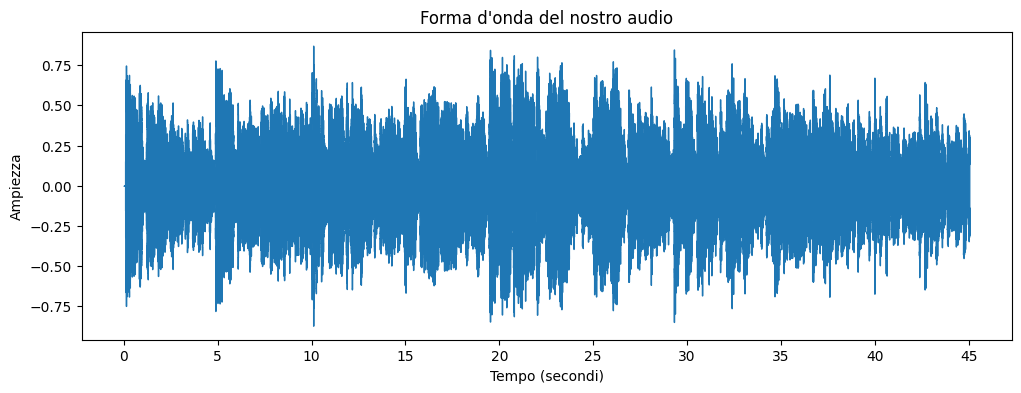

In [12]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Forma d\'onda del nostro audio')
plt.xlabel('Tempo (secondi)')
plt.ylabel('Ampiezza')
plt.show()

## 4. Estrazione delle caratteristiche emozionali

Ora estraiamo alcune caratteristiche che ci aiutano a capire le emozioni nella musica:

In [13]:
# 1. MFCC - ci dice qualcosa sul "colore" del suono
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# 2. Chroma - ci dice quali note sono suonate
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

# 3. Tempo - quanto veloce è la musica
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)

print(f"Tempo stimato: {tempo} BPM (battiti al minuto)")

Tempo stimato: [99.38401442] BPM (battiti al minuto)


## 5. Visualizzazione delle caratteristiche

Vediamo come appaiono queste caratteristiche in un grafico!

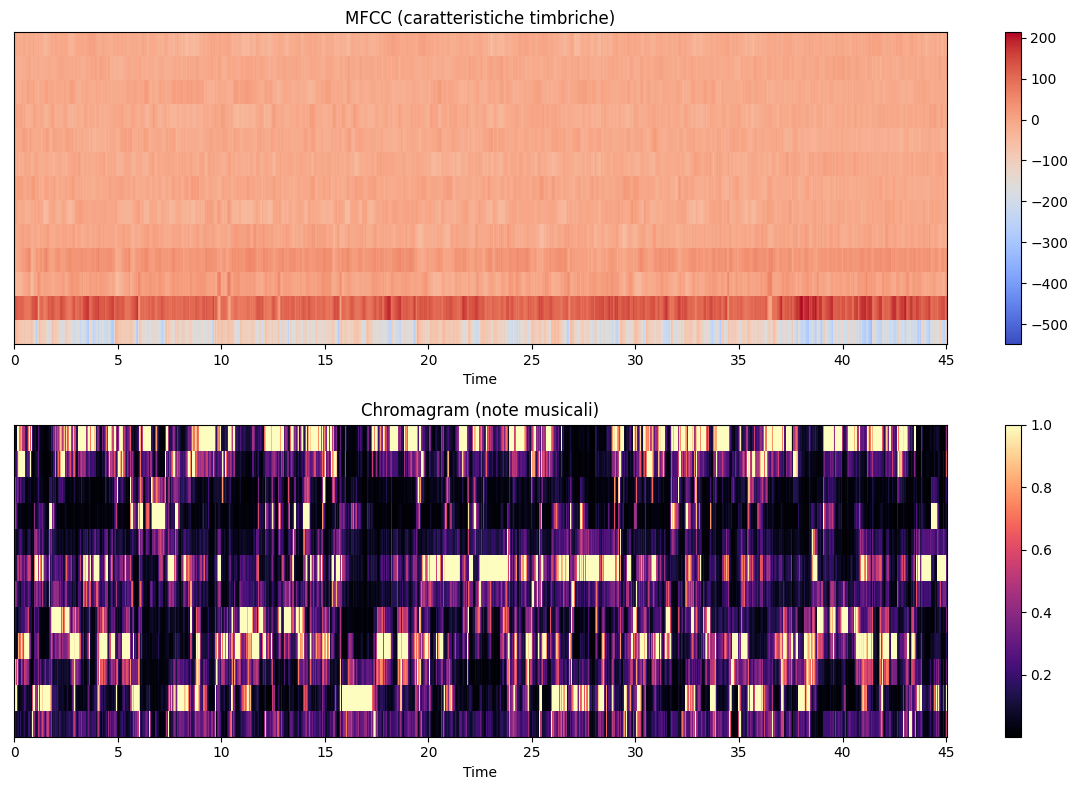

In [14]:
# Creiamo un grafico con 2 sottografici
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# MFCC - come un'impronta digitale del suono
img1 = librosa.display.specshow(mfccs, sr=sr, x_axis='time', ax=ax1)
ax1.set_title('MFCC (caratteristiche timbriche)')
fig.colorbar(img1, ax=ax1)

# Chroma - quali note sono presenti
img2 = librosa.display.specshow(chroma, sr=sr, x_axis='time', ax=ax2)
ax2.set_title('Chromagram (note musicali)')
fig.colorbar(img2, ax=ax2)

plt.tight_layout()
plt.show()

## 6. Analisi delle emozioni

Infine, calcoliamo alcune caratteristiche che ci aiutano a capire l'emozione della musica:

In [15]:
# Energia (correlata all'arousal/eccitazione)
rms = librosa.feature.rms(y=y)[0]
energia_media = np.mean(rms)

# Contrasto spettrale (correlato alla valenza/positività)
contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
contrasto_medio = np.mean(contrast)

print(f"Livello di energia (0-1): {energia_media:.3f}")
print(f"Contrasto spettrale medio: {contrasto_medio:.3f}")

# Interpretiamo i risultati in modo semplice
if energia_media > 0.1:
    print("\nQuesta musica sembra energica!")
else:
    print("\nQuesta musica sembra calma e rilassante.")

if contrasto_medio > 0:
    print("E ha un carattere brillante e vivace.")
else:
    print("E ha un carattere più cupo o malinconico.")

Livello di energia (0-1): 0.150
Contrasto spettrale medio: 26.104

Questa musica sembra energica!
E ha un carattere brillante e vivace.
